<a href="https://colab.research.google.com/github/Shakshi3104/isJohnnys/blob/master/JohnnyFace_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ZIPファイルを展開

In [55]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
!rm -R __MACOSX face
!unzip /content/drive/My\ Drive/データマイニング/2019/face.zip

Archive:  /content/drive/My Drive/データマイニング/2019/face.zip
   creating: face/
  inflating: __MACOSX/._face         
  inflating: face/.DS_Store          
  inflating: __MACOSX/face/._.DS_Store  
   creating: face/others/
   creating: face/johnnys/
   creating: face/others/赤楚衛二/
   creating: face/others/菅田将暉/
   creating: face/others/田中圭/
   creating: face/others/志尊淳/
   creating: face/others/千葉雄大/
   creating: face/others/岡田龍太郎/
   creating: face/others/綾野剛/
   creating: face/others/北村匠海/
   creating: face/others/飯島颯/
   creating: face/others/登坂広臣/
  inflating: __MACOSX/face/others/._登坂広臣  
   creating: face/others/関口メンディー/
  inflating: face/others/.DS_Store   
  inflating: __MACOSX/face/others/._.DS_Store  
   creating: face/others/板垣瑞生/
   creating: face/others/福士蒼汰/
   creating: face/others/桐山漣/
   creating: face/others/吉田仁人/
   creating: face/others/西岡健吾/
   creating: face/others/今市隆二/
  inflating: __MACOSX/face/others/._今市隆二  
   creating: face/others/永田薫/
   creating: face/others/竹

# コードの読み込み

In [57]:
!rm -R isJohnnys*
!git clone https://github.com/Shakshi3104/isJohnnys.git

Cloning into 'isJohnnys'...
remote: Enumerating objects: 327, done.
remote: Total 327 (delta 0), reused 0 (delta 0), pack-reused 327
Receiving objects: 100% (327/327), 586.29 KiB | 10.11 MiB/s, done.
Resolving deltas: 100% (161/161), done.


In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
import sys

sys.path.append("/content/isJohnnys")

In [0]:
import numpy as np
import pandas as pd

#  画像を読み込む

In [0]:
from images.dataset import Dataset

In [62]:
input_dir = "/content/face/"
dataset = Dataset(input_dir=input_dir, colab=True)
images, labels, detail_labels = dataset.load_data()

/content/face/johnnys/風間俊介/img_15.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_56.jpeg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_16.png
(64, 64, 3)
/content/face/johnnys/風間俊介/img_18.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_89.png
(64, 64, 3)
/content/face/johnnys/風間俊介/img_41.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_64.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_86.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_32.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_12.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_48.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_59.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_52.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_61.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_44.png
(64, 64, 3)
/content/face/johnnys/風間俊介/img_66.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_2.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_8.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_83.jpg
(64, 64, 3)
/content/face/johnnys/風間俊介/img_50.jpg
(64, 64, 3)
/

In [63]:
print("shape", images.shape)
print("Johnnys Images", dataset.johnnys_image_num)
print("Others Images", dataset.others_image_num)

shape (7671, 64, 64, 3)
Johnnys Images 3807
Others Images 3864


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

## one-hot vector

In [66]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test_ = to_categorical(y_test, 2)

print(x_train.shape)
print(y_test_.shape)

(6136, 64, 64, 3)
(1535, 2)


# 重みを固定するブロック数を変える

In [0]:
from networks.models import VGG, pretrained_VGG
from tensorflow.keras.optimizers import Adam
from networks.training import plot_history, ConfusionMatrix

In [0]:
output_dir = "/content/drive/My Drive/データマイニング/2019/models/"

In [0]:
def training(frozen_block_num):
  # モデルを読み込む
  if frozen_block_num is None:
    model = VGG(weight_layer_num=16)
    model_name = "vgg16_None"
  else:
    model = pretrained_VGG(weight_layer_num=16, 
                          frozen_block_num=frozen_block_num)
    model_name = "vgg16_imagenet_frozen_" + str(frozen_block_num)

  # コンパイル
  model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy',
                metrics=['accuracy'])
  
  # 学習
  conf = ConfusionMatrix(model, x_test, y_test, ["Johnnys", "Others"])
  stack = model.fit(x_train, y_train, epochs=100, batch_size=50, verbose=0,
                  validation_data=(x_test, y_test_), callbacks=[conf])
  
  score = model.evaluate(x_test, y_test_, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  plot_history(stack, filename=output_dir + "history_" + model_name + ".png")

  return score, model

In [0]:
losses = []
accs = []
name = []

None
Train on 6136 samples, validate on 1535 samples
Epoch 1/100
6136/6136 [==============================] - 13s 2ms/sample - loss: 0.7129 - acc: 0.5205 - val_loss: 0.6921 - val_acc: 0.5094
Epoch 2/100
6136/6136 [==============================] - 10s 2ms/sample - loss: 0.6659 - acc: 0.6064 - val_loss: 0.6639 - val_acc: 0.5967
Epoch 3/100
6136/6136 [==============================] - 11s 2ms/sample - loss: 0.6520 - acc: 0.6199 - val_loss: 0.6548 - val_acc: 0.6156
Epoch 4/100
6136/6136 [==============================] - 11s 2ms/sample - loss: 0.6314 - acc: 0.6465 - val_loss: 0.6342 - val_acc: 0.6391
Epoch 5/100
6136/6136 [==============================] - 11s 2ms/sample - loss: 0.6082 - acc: 0.6659 - val_loss: 0.6339 - val_acc: 0.6371
Epoch 6/100
6136/6136 [==============================] - 11s 2ms/sample - loss: 0.5855 - acc: 0.6941 - val_loss: 0.6029 - val_acc: 0.6782
Epoch 7/100
6136/6136 [==============================] - 11s 2ms/sample - loss: 0.5607 - acc: 0.7163 - val_loss: 0.6155

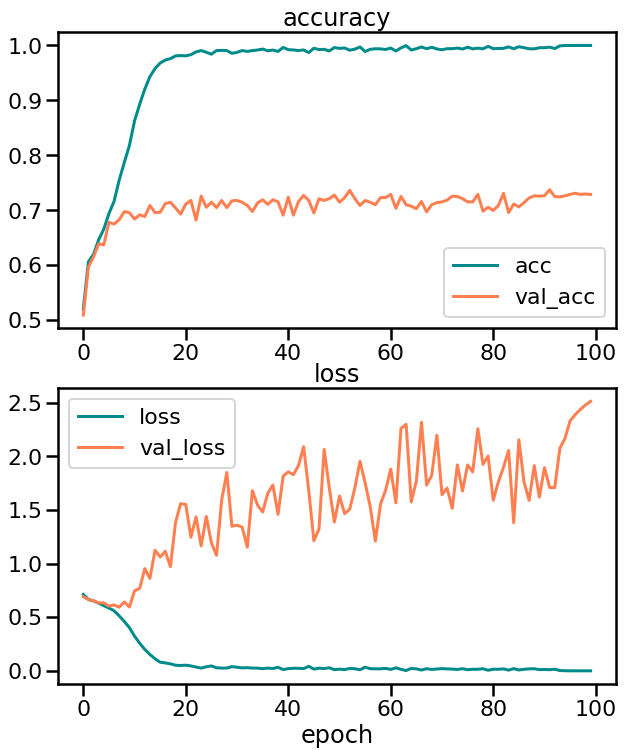

Fine-tuning
layer 0 trainable: True
layer 1 trainable: True
layer 2 trainable: True
layer 3 trainable: True
layer 4 trainable: True
layer 5 trainable: True
layer 6 trainable: True
layer 7 trainable: True
layer 8 trainable: True
layer 9 trainable: True
layer 10 trainable: True
layer 11 trainable: True
layer 12 trainable: True
layer 13 trainable: True
layer 14 trainable: True
layer 15 trainable: True
layer 16 trainable: True
layer 17 trainable: True
layer 18 trainable: True
layer 19 trainable: True
Train on 6136 samples, validate on 1535 samples
Epoch 1/100
6136/6136 [==============================] - 12s 2ms/sample - loss: 0.7046 - acc: 0.5140 - val_loss: 0.6824 - val_acc: 0.5765
Epoch 2/100
6136/6136 [==============================] - 11s 2ms/sample - loss: 0.6674 - acc: 0.5937 - val_loss: 0.6648 - val_acc: 0.5928
Epoch 3/100
6136/6136 [==============================] - 11s 2ms/sample - loss: 0.6123 - acc: 0.6615 - val_loss: 0.5754 - val_acc: 0.6958
Epoch 4/100
6136/6136 [=============

<Figure size 432x288 with 0 Axes>

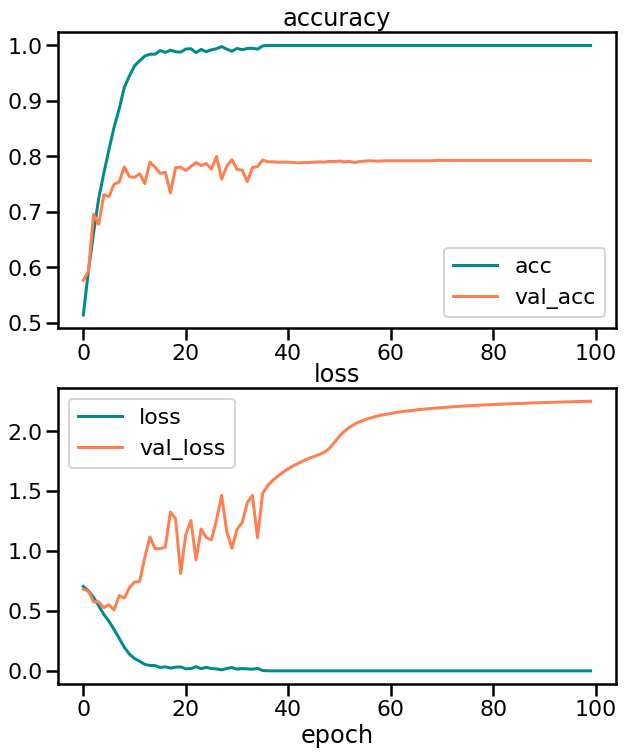

Save model
Frozen 1 - 1 ConvBlock
layer 0 trainable: False
layer 1 trainable: False
layer 2 trainable: False
layer 3 trainable: False
layer 4 trainable: True
layer 5 trainable: True
layer 6 trainable: True
layer 7 trainable: True
layer 8 trainable: True
layer 9 trainable: True
layer 10 trainable: True
layer 11 trainable: True
layer 12 trainable: True
layer 13 trainable: True
layer 14 trainable: True
layer 15 trainable: True
layer 16 trainable: True
layer 17 trainable: True
layer 18 trainable: True
layer 19 trainable: True
Train on 6136 samples, validate on 1535 samples
Epoch 1/100
6136/6136 [==============================] - 10s 2ms/sample - loss: 0.7028 - acc: 0.5292 - val_loss: 0.6733 - val_acc: 0.5954
Epoch 2/100
6136/6136 [==============================] - 9s 1ms/sample - loss: 0.6593 - acc: 0.6072 - val_loss: 0.6625 - val_acc: 0.5779
Epoch 3/100
6136/6136 [==============================] - 9s 1ms/sample - loss: 0.5978 - acc: 0.6801 - val_loss: 0.5760 - val_acc: 0.6990
Epoch 4/100


<Figure size 432x288 with 0 Axes>

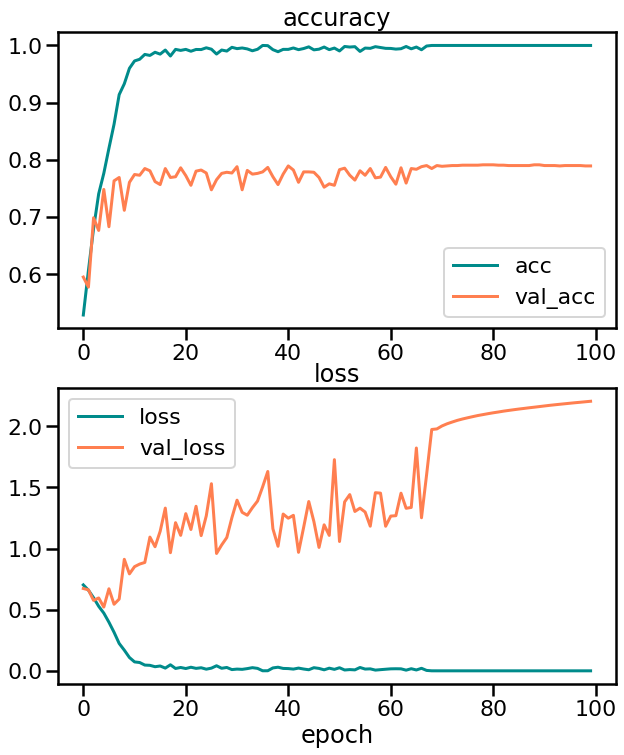

Frozen 1 - 2 ConvBlock
layer 0 trainable: False
layer 1 trainable: False
layer 2 trainable: False
layer 3 trainable: False
layer 4 trainable: False
layer 5 trainable: False
layer 6 trainable: False
layer 7 trainable: True
layer 8 trainable: True
layer 9 trainable: True
layer 10 trainable: True
layer 11 trainable: True
layer 12 trainable: True
layer 13 trainable: True
layer 14 trainable: True
layer 15 trainable: True
layer 16 trainable: True
layer 17 trainable: True
layer 18 trainable: True
layer 19 trainable: True
Train on 6136 samples, validate on 1535 samples
Epoch 1/100
6136/6136 [==============================] - 9s 2ms/sample - loss: 0.6914 - acc: 0.5500 - val_loss: 0.6815 - val_acc: 0.5935
Epoch 2/100
6136/6136 [==============================] - 8s 1ms/sample - loss: 0.6193 - acc: 0.6618 - val_loss: 0.5935 - val_acc: 0.6756
Epoch 3/100
6136/6136 [==============================] - 8s 1ms/sample - loss: 0.5479 - acc: 0.7273 - val_loss: 0.5551 - val_acc: 0.7121
Epoch 4/100
6136/6136

<Figure size 432x288 with 0 Axes>

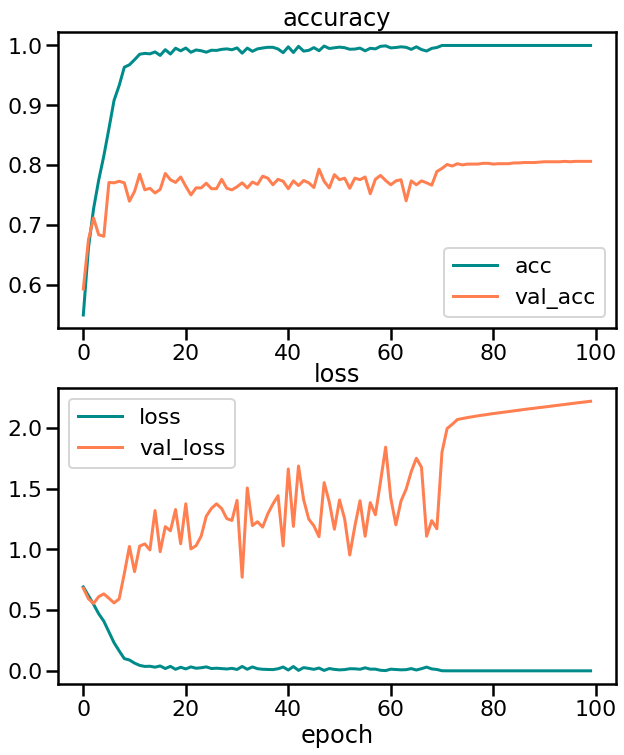

Save model
Frozen 1 - 3 ConvBlock
layer 0 trainable: False
layer 1 trainable: False
layer 2 trainable: False
layer 3 trainable: False
layer 4 trainable: False
layer 5 trainable: False
layer 6 trainable: False
layer 7 trainable: False
layer 8 trainable: False
layer 9 trainable: False
layer 10 trainable: False
layer 11 trainable: True
layer 12 trainable: True
layer 13 trainable: True
layer 14 trainable: True
layer 15 trainable: True
layer 16 trainable: True
layer 17 trainable: True
layer 18 trainable: True
layer 19 trainable: True
Train on 6136 samples, validate on 1535 samples
Epoch 1/100
6136/6136 [==============================] - 8s 1ms/sample - loss: 0.6942 - acc: 0.5699 - val_loss: 0.6614 - val_acc: 0.6046
Epoch 2/100
6136/6136 [==============================] - 7s 1ms/sample - loss: 0.6130 - acc: 0.6666 - val_loss: 0.6085 - val_acc: 0.6599
Epoch 3/100
6136/6136 [==============================] - 7s 1ms/sample - loss: 0.5372 - acc: 0.7308 - val_loss: 0.5906 - val_acc: 0.6951
Epoch 

In [71]:
# None
print("None")
score, model = training(None)
losses += [score[0]]
accs += [score[1]]
name += ["VGG_None"]

# Transfer-Learning
for i in range(0, 6):
  if i == 0:
    print("Fine-tuning")
    name += ["VGG_FT"]
  else:
    print("Frozen 1 - " + str(i) + " ConvBlock")
    name+= ["VGG_B" + str(i)]

  # 学習
  score, model = training(frozen_block_num=i)

  # Accuracyが高かったらモデルを保存
  if accs[-1] < score[1]:
    print("Save model")
    model_name = "vgg16_imagenet"
    # 重みを保存
    model.save_weights(output_dir + model_name + ".hdf5")
    # モデルを保存
    model.save(output_dir + model_name + ".h5")

  # 精度を記録
  losses += [score[0]]
  accs += [score[1]]

In [0]:
import pandas as pd

In [73]:
scores = pd.DataFrame({"loss": losses, "accuracy": accs, "name": name})
scores

,loss,accuracy,name
0,2.515361,0.728990,VGG_None
1,2.251534,0.792182,VGG_FT
2,2.204752,0.789577,VGG_B1
3,2.221346,0.806515,VGG_B2
4,2.500392,0.769381,VGG_B3
5,2.838828,0.713355,VGG_B4
6,2.423565,0.666449,VGG_B5


In [0]:
scores.to_csv(output_dir + "scores.csv")